# Glass Identification With Random Forests

## Introduction 

__Dataset Used__: [Glass identification dataset from UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/Glass+Identification)

__Objectives__

1. Build feature set
2. Create train-test split
3. Evaluate accuracy of random forest with number of estimators = 3
4. Find best value of number of estimators for better performance

## Environment Setup

In [2]:
## Suppress Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

## Imports
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns

## Magics
%matplotlib inline

## Initializations
dataset_path = ('dataset/glass.data')

## Building Feature Set

In this section, we will load the dataset, explore it a little bit, and adjust our features so we can get the most out of them.

In [3]:
## Read the dataset and display statistics and basic info

df = pd.read_csv(dataset_path, names = [
        'ID',                           # numeric identifier of the instance
        'RI',                           # refractive index
        'NA2O',                         # Sodium oxide 
        'MGO',                          # magnesium oxide
        'AL2O3',                        # aluminum oxide
        'SIO2',                         # silcon oxide
        'K2O',                          # potassium oxide
        'CAO',                          # calcium oxide
        'BAO',                          # barium oxide
        'FE2O3',                        # iron oxide
        'TYPE',                         # type of glass
])

df.head()

,ID,RI,NA2O,MGO,AL2O3,SIO2,K2O,CAO,BAO,FE2O3,TYPE
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
# 'ID' column is not needed (dataframe is already indexed), so we remove it
del df['ID']

# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI       214 non-null float64
NA2O     214 non-null float64
MGO      214 non-null float64
AL2O3    214 non-null float64
SIO2     214 non-null float64
K2O      214 non-null float64
CAO      214 non-null float64
BAO      214 non-null float64
FE2O3    214 non-null float64
TYPE     214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


There appear to be no null values and all the data types are correct.

In [5]:
## The unique types of glass in this set (should be 6 in count) and their corresponding counts
df['TYPE'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: TYPE, dtype: int64

Here are the meanings of the types for later reference:

1. Float-processed building windows
2. Non-float-processed building windows
3. Float-processed vehicle windows
4. Non-float-processed vehicle windows (none in this database)
5. Containers
6. Tableware
7. Headlamps

Notice that there are no entries for type 4.

Now let's see the pairwise relationships of the various features.

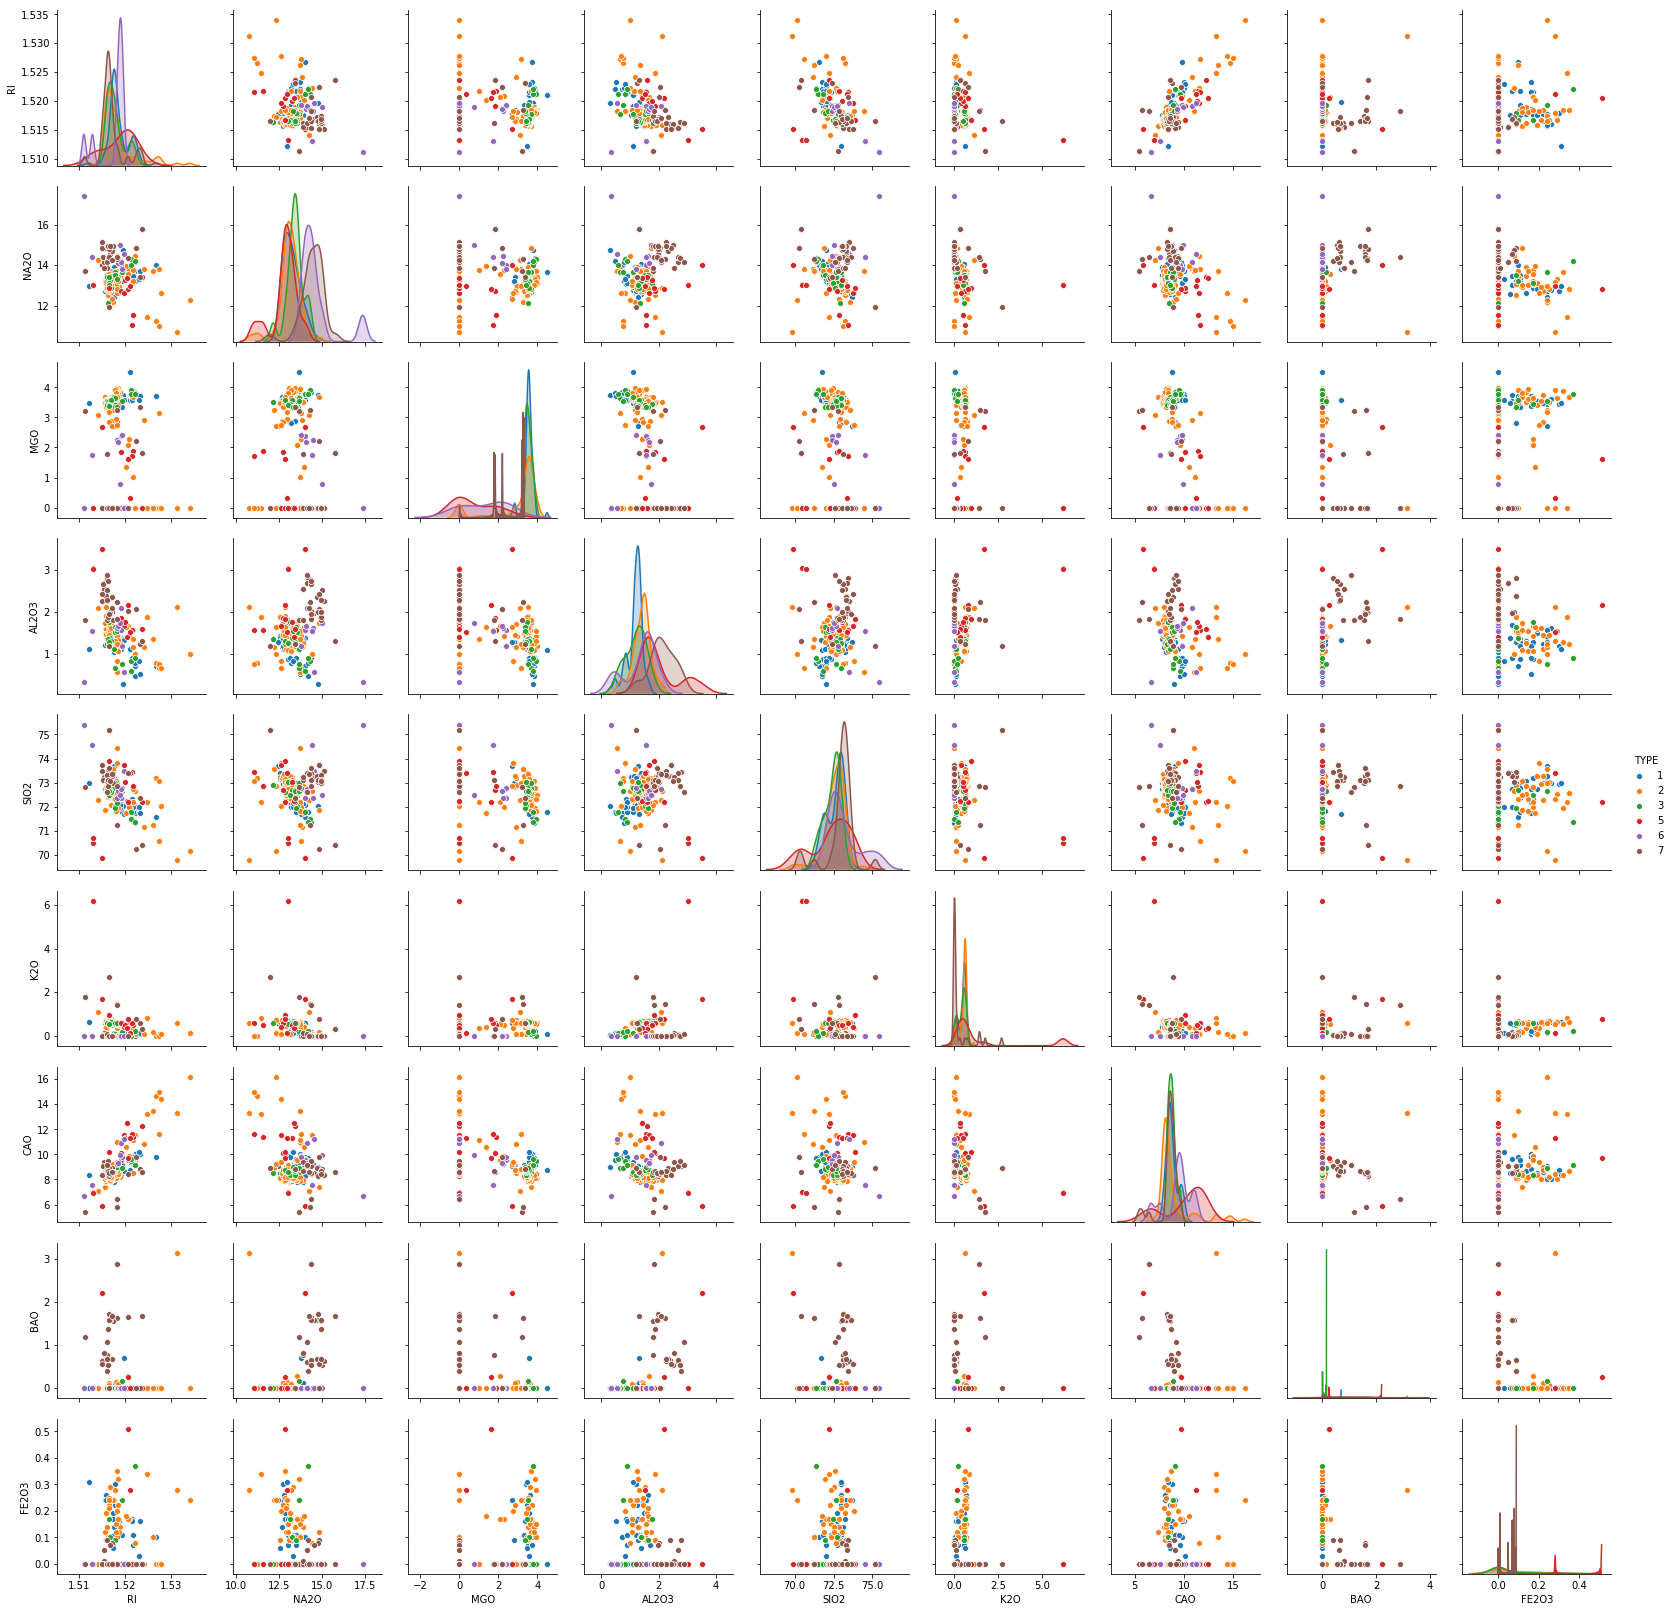

In [6]:
# get feature names
features = list(df.columns)
features.remove('TYPE')

# plot with sns
sns.pairplot(df, hue='TYPE', vars=features)

### Standarizing the dataset

Let's take a look at the ranges of values for the various features:

In [7]:
for column in df.columns:
    print(column, ':\tMin = ', df[column].min(), ' \tMax = ', df[column].max(), sep='')

RI:	Min = 1.51115 	Max = 1.53393
NA2O:	Min = 10.73 	Max = 17.38
MGO:	Min = 0.0 	Max = 4.49
AL2O3:	Min = 0.29 	Max = 3.5
SIO2:	Min = 69.81 	Max = 75.41
K2O:	Min = 0.0 	Max = 6.21
CAO:	Min = 5.43 	Max = 16.19
BAO:	Min = 0.0 	Max = 3.15
FE2O3:	Min = 0.0 	Max = 0.51
TYPE:	Min = 1 	Max = 7


As we can see, the features' values lie in very different ranges. It will be useful to standardize all the features.

In [8]:
# import standard scaler
from sklearn.preprocessing import StandardScaler

# separate features from targets
X = np.array(df.drop(['TYPE'], axis = 1))
y = np.array(df['TYPE'])

# apply StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

## Creating Train-Test Split

In [9]:
## import train_test_split
from sklearn.model_selection import train_test_split

# specify test split size
test_size = 0.2             # 0.2 * 214 = 42 test samples

# create train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state = 42)

## Training a Random Forest

In [10]:
## Initialization
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(n_estimators = 3, random_state = 42)

## train
rfc.fit(X_train, y_train)

## test
y_pred = rfc.predict(X_test)

## accuracy
print("Accuracy: ", "%.2f"%(100*accuracy_score(y_test, y_pred)), '%', sep='')

Accuracy: 79.07%


Let's see if we can improve this with a different number of estimators

## Finding The Best Value for Number of Estimators

In [11]:
## We'll check in range 1 to 100

best_val = -1
best_acc = 0

for e in range(1, 101):
    rfc = RandomForestClassifier(n_estimators = e, random_state = 42)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    if acc > best_acc:
        best_acc = acc
        best_val = e

print('Best value for number of estimators:', e)
print('Best accuracy: ', '%.2f'%(100*best_acc), '%', sep='')

Best value for number of estimators: 100
Best accuracy: 86.05%


This is a better accuracy score, but still leaves a something to be desired.